In [22]:
import json
import matplotlib.pyplot as plt
from datasets import load_dataset

# MD_GENDER

Análisis de la distribución de muestras de md_gender. Lo haré desde el dataset ya preprocesado por mi (luego comprobar con el paper que coiciden los números principales)

In [2]:
with open('Datasets\md_gender\md_complete.json','r',encoding="utf8") as f:
    md_data = json.load(f)

Primero debo separar el dataset por dimensión

In [6]:
md_about = {text:item['label_about'] for text,item in md_data.items() if len(item['label_about']) > 0}
md_to = {text:item['label_to'] for text,item in md_data.items() if len(item['label_to']) > 0}
md_as = {text:item['label_as'] for text,item in md_data.items() if len(item['label_as']) > 0}

In [10]:
print('Número de muestras por dimensión: ')
print(f'ABOUT \t{len(md_about)}')
print(f'TO \t{len(md_to)}')
print(f'AS \t{len(md_as)}')

Número de muestras por dimensión: 
ABOUT 	784
TO 	792
AS 	767


En el about y en el to me sale que tengo una oración de menos. Analizo este punto individualmente para cada dimensión

Analizo cuantas muestras tengo por género en cada dimensión

### ABOUT

In [21]:
male = 0
female = 0
for text, label in md_about.items():
    if len(label)>1:
        print('El siguiente texto tiene más de una etiqueta: ')
        print(text)
        print(f"Sus etiquetas son {label}")
    if label[0] == 'ABOUT:female':
        female+=1
    elif label[0] == 'ABOUT:male':
        male +=1

print(f'Etiquetas male: {male}')
print(f'Etiquetas female: {female}')

El siguiente texto tiene más de una etiqueta: 
never heard of it. where is she from?
Sus etiquetas son ['ABOUT:female', 'ABOUT:female']
Etiquetas male: 384
Etiquetas female: 400


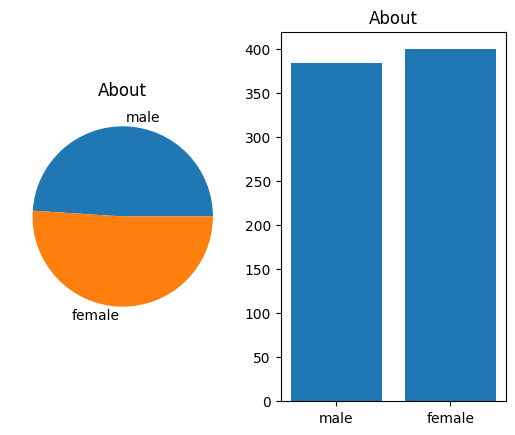

In [45]:
f =plt.figure()

f.add_subplot(1,2,1)
plt.pie([male,female],labels=['male','female'])
plt.title('About')
f.add_subplot(1,2,2)
plt.bar(['male','female'],[male,female])
plt.title('About')
plt.show()

Tengo que entrar en huggingface y comprobar esa muestra concreta, si trae también dos etiquetas podré asumir que esa es la que falta. En huggingface la etiqueta ABOUT:female es la 0, mientras que ABOUT:male es la 1 y class_type=0 se refiere a la dimensión about

In [34]:
md_h = load_dataset('md_gender_bias','new_data')
md_h_train = md_h['train']

Reusing dataset md_gender_bias (C:\Users\kuina\.cache\huggingface\datasets\md_gender_bias\new_data\1.0.0\8ae77b51acf93383161cc954b146159291beca6c979b54ce228c46db86116c05)


  0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
for item in md_h_train:
    if item['text'] == 'never heard of it. where is she from?':
        print(item['labels'])
        print(item)

[0]
{'text': 'never heard of it. where is she from?', 'original': 'Never heard of it. Where is he from?', 'labels': [0], 'class_type': 0, 'turker_gender': 0, 'episode_done': True, 'confidence': 'certain'}
[0]
{'text': 'never heard of it. where is she from?', 'original': 'Never heard of it. Where is he from?', 'labels': [0], 'class_type': 0, 'turker_gender': 1, 'episode_done': True, 'confidence': 'certain'}


Se puede ver que esa muestra que "falta" en mis datos procesados es implemente que está repetida en huggingface y por tanto tiene la misma etiqueta. La única diferencia es quien anotó la muestra, por lo demás el grado de confianza de quien anotó es la misma, por lo que puedo considerarlas iguales.

### TO

In [51]:
male = 0
female = 0
for text, label in md_to.items():
    if len(label)>1:
        print('El siguiente texto tiene más de una etiqueta: ')
        print(text)
        print(f"Sus etiquetas son {label}")
    if label[0] == 'PARTNER:female':
        female+=1
    elif label[0] == 'PARTNER:male':
        male +=1

print(f'Etiquetas male: {male}')
print(f'Etiquetas female: {female}')

El siguiente texto tiene más de una etiqueta: 
hello ma'am, how are you?
Sus etiquetas son ['PARTNER:female', 'PARTNER:female']
Etiquetas male: 411
Etiquetas female: 381


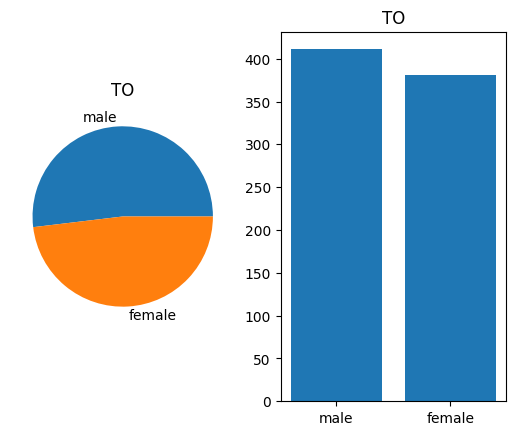

In [52]:
f =plt.figure()

f.add_subplot(1,2,1)
plt.pie([male,female],labels=['male','female'])
plt.title('TO')
f.add_subplot(1,2,2)
plt.bar(['male','female'],[male,female])
plt.title('TO')
plt.show()

Debo hacer la misma comprobación que con el about. En huggingface la etiqueta partner:female es 2, y la dimensión de partner (to) tiene class_type 1

In [48]:
for item in md_h_train:
    if item['text'] == "hello ma'am, how are you?":
        print(item['labels'])
        print(item)

[2]
{'text': "hello ma'am, how are you?", 'original': 'hello sir, how are you ', 'labels': [2], 'class_type': 1, 'turker_gender': 0, 'episode_done': True, 'confidence': 'certain'}
[2]
{'text': "hello ma'am, how are you?", 'original': 'hello madam how are you', 'labels': [2], 'class_type': 1, 'turker_gender': 0, 'episode_done': True, 'confidence': 'certain'}


Aquí lo que cambia es como se reescribió la muestra durante el proceso de anotación. CONSULTAR

### AS

In [53]:
male = 0
female = 0
for text, label in md_as.items():
    if len(label)>1:
        print('El siguiente texto tiene más de una etiqueta: ')
        print(text)
        print(f"Sus etiquetas son {label}")
    if label[0] == 'SELF:female':
        female+=1
    elif label[0] == 'SELF:male':
        male +=1

print(f'Etiquetas male: {male}')
print(f'Etiquetas female: {female}')

Etiquetas male: 396
Etiquetas female: 371


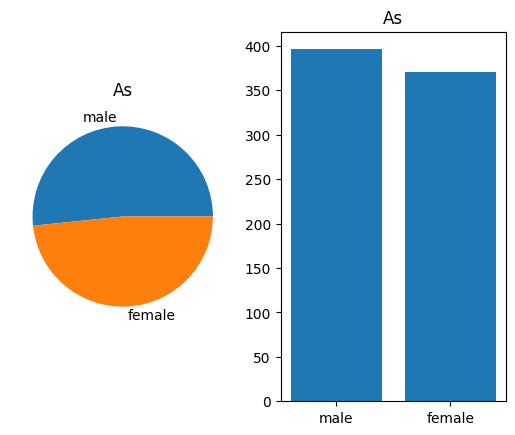

In [54]:
f =plt.figure()

f.add_subplot(1,2,1)
plt.pie([male,female],labels=['male','female'])
plt.title('As')
f.add_subplot(1,2,2)
plt.bar(['male','female'],[male,female])
plt.title('As')
plt.show()

# Convai TRAIN

In [55]:
with open('Datasets\ConvAI2\convai2_complete.json','r') as f:
    data = json.load(f)

In [59]:
convai_train = data['train']

In [60]:
convai_about = {text:item['label_about'] for text,item in convai_train.items() if len(item['label_about']) > 0}
convai_to = {text:item['label_to'] for text,item in convai_train.items() if len(item['label_to']) > 0}
convai_as = {text:item['label_as'] for text,item in convai_train.items() if len(item['label_as']) > 0}

In [61]:
print('Número de muestras por dimensión: ')
print(f'ABOUT \t{len(convai_about)}')
print(f'TO \t{len(convai_to)}')
print(f'AS \t{len(convai_as)}')

Número de muestras por dimensión: 
ABOUT 	73398
TO 	73398
AS 	73398


Me da las mismas en todas las dimensiones (seguramente por como hice la unión entre parlai y huggingface), pero debo tener en cuenta la presencia de la etiqueta desconocido. Voy a analizar distribución por dimensión

### ABOUT

In [63]:
male = 0
female = 0
unk = 0
for text, item in convai_about.items():
    for label in item:
        if label == 'ABOUT:male':
            male+=1
        elif label == 'ABOUT:female':
            female += 1
        elif label == 'ABOUT:unknown':
            unk += 1

print(f'Etiquetas male: {male}')
print(f'Etiquetas female: {female}')
print(f'Etiquetas desconocidas: {unk}')

Etiquetas male: 42396
Etiquetas female: 31002
Etiquetas desconocidas: 0


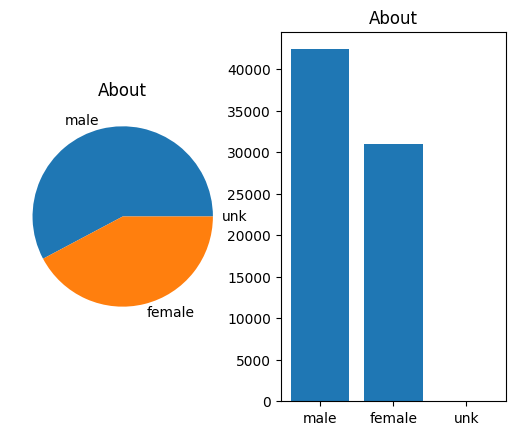

In [64]:
f =plt.figure()

f.add_subplot(1,2,1)
plt.pie([male,female,unk],labels=['male','female','unk'])
plt.title('About')
f.add_subplot(1,2,2)
plt.bar(['male','female','unk'],[male,female,unk])
plt.title('About')
plt.show()

### TO

Debo tener en cuenta que aquí puede haber muestras con varias etiquetas

In [67]:
male = 0
female = 0
unk = 0
for text, item in convai_to.items():
    for label in item:
        if label == 'PARTNER:male':
            male+=1
        elif label == 'PARTNER:female':
            female += 1
        elif label == 'PARTNER:unknown':
            unk += 1

print(f'Etiquetas male: {male}')
print(f'Etiquetas female: {female}')
print(f'Etiquetas desconocidas: {unk}')

Etiquetas male: 12363
Etiquetas female: 12750
Etiquetas desconocidas: 48935


En male y female me salen como 10.000 menos, en desconocido me salen la mitad. ¿Podría ser porque al unir huggingface con parlai me quedé con la intersección de ambos conjuntos? 

### AS

In [72]:
male = 0
female = 0
unk = 0
for text, item in convai_as.items():
    for label in item:
        if label == 'SELF:male':
            male+=1
        elif label == 'SELF:female':
            female += 1
        elif label == 'SELF:unknown':
            unk += 1

print(f'Etiquetas male: {male}')
print(f'Etiquetas female: {female}')
print(f'Etiquetas desconocidas: {unk}')

Etiquetas male: 12572
Etiquetas female: 12897
Etiquetas desconocidas: 48566
